In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#hyperparameter
vocab_size = 5000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .85

In [ ]:
#cleaning data
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}—\[\]\|@,;‘?|।!`-॥–’-]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.replace('\n',' ')
    #replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    return text

articles = []
labels = []

with open("data.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        article = row[0]
        temp = clean_text(article)
        articles.append(temp)
print(len(labels))
print(len(articles))
print(labels)
print(articles)

402
402
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '

In [ ]:
#Splitting into train test
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

341
341
341
61
61


In [ ]:
#tokenizing out of vocabulary words
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [ ]:
dict(list(word_index.items())[1:10])

{'আজ': 6,
 'আমার': 5,
 'এ': 8,
 'করে': 10,
 'তার': 7,
 'তোমার': 9,
 'না': 2,
 'যে': 4,
 'সে': 3}

In [ ]:
#turning those tokens into lists of sequence
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [ ]:
print(train_sequences[10])

[1, 4547, 2699, 1, 2659, 2231, 3347, 346, 19, 101, 4548, 2700, 128, 978, 55, 1, 1899, 1281, 1664, 19, 4504, 1, 2701, 1, 31, 2699, 346, 471, 90, 706, 1, 4549, 3, 1, 43, 6, 3383, 31, 1, 202, 334, 90, 347, 1, 1, 4550, 1, 334, 1051, 334, 754, 1, 1, 2699, 551, 1, 4551, 979, 334, 1, 2702, 1, 2703, 1, 280, 43, 556, 31, 1657, 31, 217, 1, 2704, 13, 4552, 1, 2232, 43, 1, 31, 4553, 31, 3384, 2233, 308, 29, 2699, 2234]


In [ ]:
#padding words to same length
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(train_sequences[10])

[1, 4547, 2699, 1, 2659, 2231, 3347, 346, 19, 101, 4548, 2700, 128, 978, 55, 1, 1899, 1281, 1664, 19, 4504, 1, 2701, 1, 31, 2699, 346, 471, 90, 706, 1, 4549, 3, 1, 43, 6, 3383, 31, 1, 202, 334, 90, 347, 1, 1, 4550, 1, 334, 1051, 334, 754, 1, 1, 2699, 551, 1, 4551, 979, 334, 1, 2702, 1, 2703, 1, 280, 43, 556, 31, 1657, 31, 217, 1, 2704, 13, 4552, 1, 2232, 43, 1, 31, 4553, 31, 3384, 2233, 308, 29, 2699, 2234]


In [ ]:
print(train_padded[10])

[   1 4547 2699    1 2659 2231 3347  346   19  101 4548 2700  128  978
   55    1 1899 1281 1664   19 4504    1 2701    1   31 2699  346  471
   90  706    1 4549    3    1   43    6 3383   31    1  202  334   90
  347    1    1 4550    1  334 1051  334  754    1    1 2699  551    1
 4551  979  334    1 2702    1 2703    1  280   43  556   31 1657   31
  217    1 2704   13 4552    1 2232   43    1   31 4553   31 3384 2233
  308   29 2699 2234    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
#padding for validation sequence
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

61
(61, 100)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

<OOV> পদবী মেয়েদের <OOV> গোলমাল ভারী অনেকের নামে তাই দেখি বাড়াবাড়ি আ কার অন্ত দিয়ে <OOV> করার চেষ্টা হাসির তাই ভূমিকা <OOV> গুপ্ত <OOV> হয় মেয়েদের নামে দেখেছি অনেক চিঠি <OOV> খামে সে <OOV> যদি আজ ঘোষ হয় <OOV> তা হলে অনেক মেয়ে <OOV> <OOV> পালিত <OOV> হলে পাল হলে পালা <OOV> <OOV> মেয়েদের জ্বালা <OOV> মল্লিকা দাস হলে <OOV> শোনাবে <OOV> অতিশয় <OOV> কর যদি করা হয় ধর হয় ধরা <OOV> দেখবে এই পৃথিবীটা <OOV> নাগ যদি <OOV> হয় সেন হয় সেনা বড়ই কঠিন হবে মেয়েদের চেনা ? ? ? ? ? ? ? ? ? ? ? ?
---
﻿মেয়েদের পদবী মেয়েদের পদবীতে গোলমাল ভারী  অনেকের নামে তাই দেখি বাড়াবাড়ি   আ কার অন্ত দিয়ে মহিলা করার চেষ্টা হাসির  তাই ভূমিকা ছড়ার   গুপ্ত   গুপ্তা  হয় মেয়েদের নামে  দেখেছি অনেক চিঠি  পোষ্টকার্ড  খামে  সে নিয়মে যদি আজ  ঘোষ  হয়  ঘোষা   তা হলে অনেক মেয়ে করবেই গোসা   পালিত   পালিতা  হলে  পাল  হলে  পালা  নির্ঘাৎ বাড়বেই মেয়েদের জ্বালা   মল্লিক   মল্লিকা     দাস  হলে  দাসা  শোনাবে পদবীগুলো অতিশয় খাসা   কর  যদি  করা  হয়   ধর  হয়  ধরা  মেয়েরা দেখবে এই পৃথিবীটা  “সরা”   নাগ  যদি  নাগা  হয়  সেন  হয়  সেনা  বড়ই কঠিন হবে মে

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of 
    # size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),

    # Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards
    # through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term
    # dependencies. We then fit it to a dense neural network to do classification.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    # tf.keras.layers.LSTM(embedding_dim),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    # using ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    
    # Adding a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#using sparse_categorical_crossentropy as loss function
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=
                    (validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
11/11 - 6s - loss: 1.7295 - accuracy: 0.3842 - val_loss: 1.7834 - val_accuracy: 0.0000e+00
Epoch 2/10
11/11 - 1s - loss: 1.2937 - accuracy: 0.4194 - val_loss: 1.3636 - val_accuracy: 0.0000e+00
Epoch 3/10
11/11 - 1s - loss: 1.0448 - accuracy: 0.4956 - val_loss: 1.4551 - val_accuracy: 0.0000e+00
Epoch 4/10
11/11 - 1s - loss: 0.9355 - accuracy: 0.6041 - val_loss: 1.4947 - val_accuracy: 0.2295
Epoch 5/10
11/11 - 1s - loss: 0.7667 - accuracy: 0.6569 - val_loss: 1.4784 - val_accuracy: 0.4590
Epoch 6/10
11/11 - 1s - loss: 0.6640 - accuracy: 0.7595 - val_loss: 1.1995 - val_accuracy: 0.6557
Epoch 7/10
11/11 - 1s - loss: 0.5221 - accuracy: 0.8270 - val_loss: 0.7887 - val_accuracy: 0.7213
Epoch 8/10
11/11 - 1s - loss: 0.3766 - accuracy: 0.9091 - val_loss: 1.3288 - val_accuracy: 0.4918
Epoch 9/10
11/11 - 1s - loss: 0.1752 - accuracy: 0.9736 - val_loss: 0.7035 - val_accuracy: 0.7377
Epoch 10/10
11/11 - 1s - loss: 0.0907 - accuracy: 0.9824 - val_loss: 0.9757 - val_accuracy: 0.7377


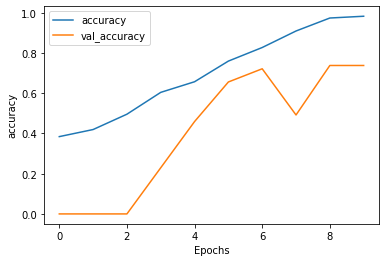

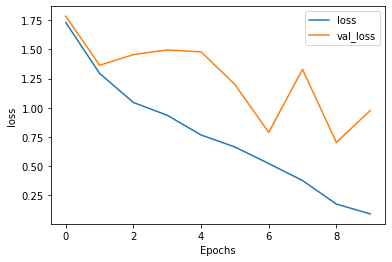

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")